In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
pd.set_option("max_columns",500)

In [2]:
#import geo data
shapefile = gpd.read_file('data/Provinces/Provinces.shp')
shapefile.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [3]:
shapefile["x"] = shapefile.geometry.centroid.x
shapefile["y"] = shapefile.geometry.centroid.y

shapefile.head()

<ipython-input-3-702330a6c344>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile["x"] = shapefile.geometry.centroid.x
<ipython-input-3-702330a6c344>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile["y"] = shapefile.geometry.centroid.y


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,x,y
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",120.805536,17.579238
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",125.522900,9.014507
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",125.757300,8.403420
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",122.247555,11.609857
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",123.615464,13.211274


In [4]:
voter = pd.read_csv('data/2016-2019-voter-data.csv')

In [5]:
province = {}

for i in voter["Province"].unique(): 
    s_province = [x for x in shapefile["PROVINCE"].unique() if i == x.upper()]
    if len(s_province) == 1:
        province[i] = s_province[0]
    else:
        province[i] = 'INPUT'

province['NCR'] = 'Metropolitan Manila'
province['DAVAO OCCIDENTAL'] = 'Shariff Kabunsuan'

# Replace province name
voter["Province"] = voter["Province"].replace(province)
print(sorted(voter["Province"].unique()))

['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay', 'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes', 'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan', 'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz', 'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley', 'Davao Oriental', 'Davao del Norte', 'Davao del Sur', 'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila', 'Misamis Occidental', 'Misamis Oriental', 'Mountain Province', 'Negros Occidental', 'Negros Oriental', 'North Cotabato', 'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga', 'Pangasinan', 'Quezon', 'Quirino', 'Rizal', 'Romblon', 'Samar', 'Sarangani', 'Shariff Kabunsuan', 'Siquijor', 'Sorsogon', 'South Cotabato', 'Sou

In [6]:
#by gender 
province_data = voter.groupby("Province").agg({"2016-Registered_Male":"sum","2016-Registered_Female":"sum"})

province_data

,2016-Registered_Male,2016-Registered_Female
Province,,
Abra,80429.0,76539.0
Agusan del Norte,205208.0,206753.0
Agusan del Sur,189657.0,183843.0
Aklan,171489.0,173870.0
Albay,356749.0,385455.0
...,...,...
Tawi-Tawi,94682.0,89197.0
Zambales,218763.0,243969.0
Zamboanga Sibugay,179241.0,171458.0


In [7]:
#joining province with voter
# Complete the code
merged_data = pd.merge(shapefile, province_data, left_on = 'PROVINCE', right_on = 'Province')
merged_data

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,x,y,2016-Registered_Male,2016-Registered_Female
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",120.805536,17.579238,80429.0,76539.0
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",125.522900,9.014507,205208.0,206753.0
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",125.757300,8.403420,189657.0,183843.0
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",122.247555,11.609857,171489.0,173870.0
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",123.615464,13.211274,356749.0,385455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,177,PHL,Philippines,78,Tawi-Tawi,None,None,Lalawigan|Probinsya,Province,Tawi-Tawi,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4...",119.861000,5.262053,94682.0,89197.0
78,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,Zambales,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",120.143706,15.288580,218763.0,243969.0
79,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",122.813013,8.052018,307585.0,297561.0
80,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",122.992859,7.673516,476915.0,499035.0


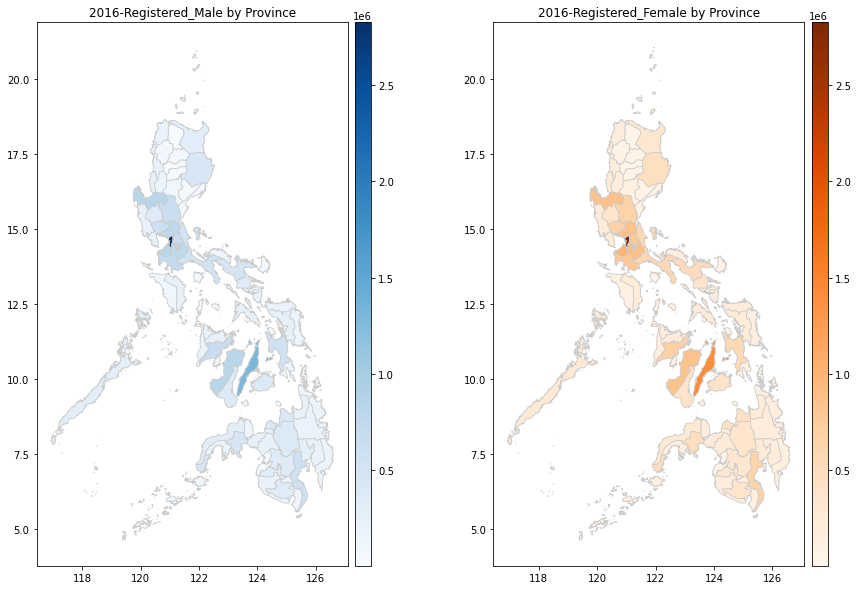

In [8]:
# set a variable that will call whatever column we want to visualise on the map
from mpl_toolkits.axes_grid1 import make_axes_locatable

vars = ["2016-Registered_Male","2016-Registered_Female"]
fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
color = ["Blues","Oranges"]
for i in range(2):
    # set the range for the choropleth
    vmin, vmax = merged_data[vars[0]].min(), merged_data[vars[0]].max()
    
    # Complete the code
    merged_data.plot(column=vars[i],cmap=color[i], linewidth=0.8, ax=ax[i], edgecolor='0.8', vmin=vmin, vmax=vmax)
    ax[i].set_title(vars[i]+ " by Province")
    sm = plt.cm.ScalarMappable(cmap=color[i], norm=plt.Normalize(vmin=vmin, vmax=vmax))

    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sm, cax=cax, orientation='vertical')

In [9]:
merged_data.loc[:,["NAME_1",vars[1]]].sort_values(by=vars[1],ascending=False)[:5]

,NAME_1,2016-Registered_Female
46,Metropolitan Manila,3426657.0
24,Cebu,1423453.0
23,Cavite,1002173.0
39,Laguna,891472.0
16,Bulacan,873622.0


In [10]:
merged_data.loc[:,["NAME_1",vars[0]]].sort_values(by=vars[0],ascending=False)[:5]

,NAME_1,2016-Registered_Male
46,Metropolitan Manila,2826592.0
24,Cebu,1298835.0
23,Cavite,840990.0
60,Pangasinan,834319.0
50,Negros Occidental,812389.0


In [11]:
print(f"{vars[0]}")
display(merged_data["2016-Registered_Male"].sum())

print(f"{vars[1]}")
display(merged_data[vars[1]].sum())

2016-Registered_Male


26311706.0

2016-Registered_Female


28052138.0

In [12]:
df = pd.DataFrame({'nb_people':[merged_data[vars[1]].sum(),merged_data["2016-Registered_Male"].sum()], 'group':["Female", "Male"] })

In [13]:
df

,nb_people,group
0,28052138.0,Female
1,26311706.0,Male


In [14]:
#!pip install squarify

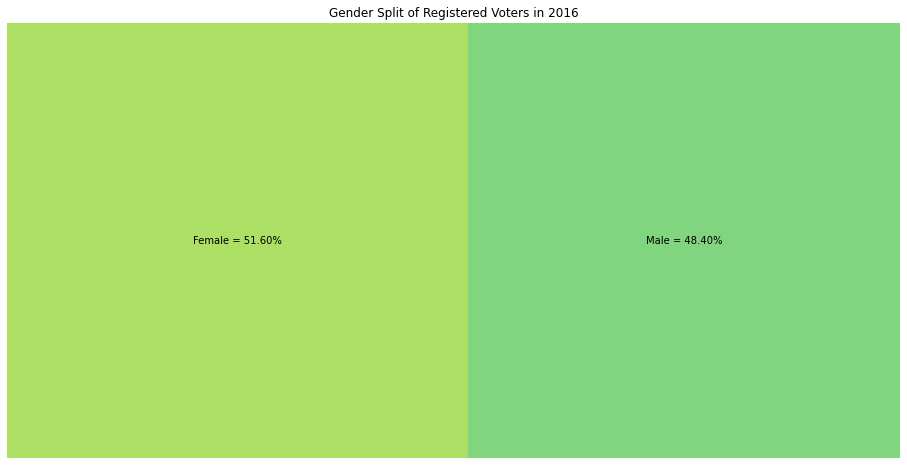

In [15]:
import squarify
plt.figure(figsize=(16,8))
perc = [f'{i/df["nb_people"].sum()*100:5.2f}%' for i in df['nb_people']]
lbl = [f'{el[0]} = {el[1]}' for el in zip(df['group'], perc)]
squarify.plot(sizes=df['nb_people'], label=lbl, alpha=.8 )
plt.axis("off")
plt.title("Gender Split of Registered Voters in 2016")
plt.show()

Text(0.5, 0, 'Number of Registered Voters in Millions')

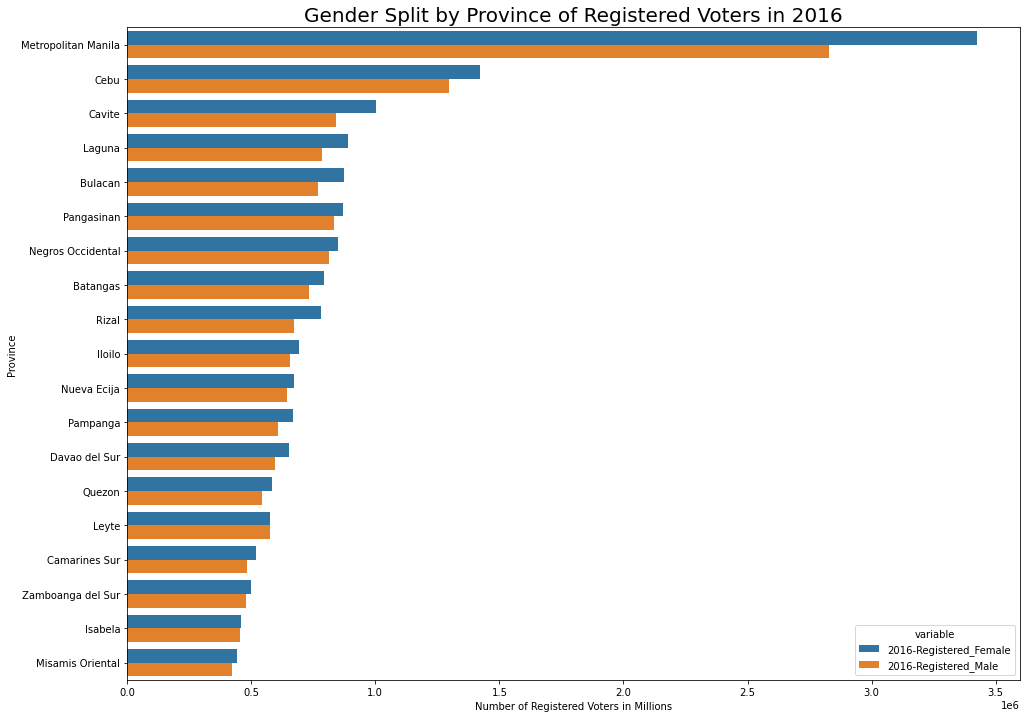

In [77]:
plt.figure(figsize=(16,12))
c = province_data.sort_values(by="2016-Registered_Female",ascending=False)
d = c.reset_index().melt(id_vars="Province").sort_values(by=["value","Province"],ascending={False,True})

d
sns.barplot(data=d[:38],x="value",y="Province",hue="variable")
plt.title("Gender Split by Province of Registered Voters in 2016", fontsize=20)
plt.xlabel("Number of Registered Voters in Millions")

In [65]:
plt.figure(figsize=(17,8))

c = province_data.sort_values(by="2016-Registered_Female",ascending=False)
sns.barplot(data=c[:15],x="Value")
c[:15].plot(kind="bar",)
plt.title("Gender Split of Voters in 2016 by Province")

ValueError: Could not interpret input 'Value'

<Figure size 1224x576 with 0 Axes>